# K- Nearest Neighbors Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(r"C:\Users\DELL\Desktop\Iris.csv")
data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [3]:
X = data.iloc[:,1:5].values
y = data.iloc[:, 5].values


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [7]:
y_pred = classifier.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0  9  1]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



# Hyperparameter Optimization for k value

In [9]:
error = []

# Calculating error for K values between 1 and 60
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

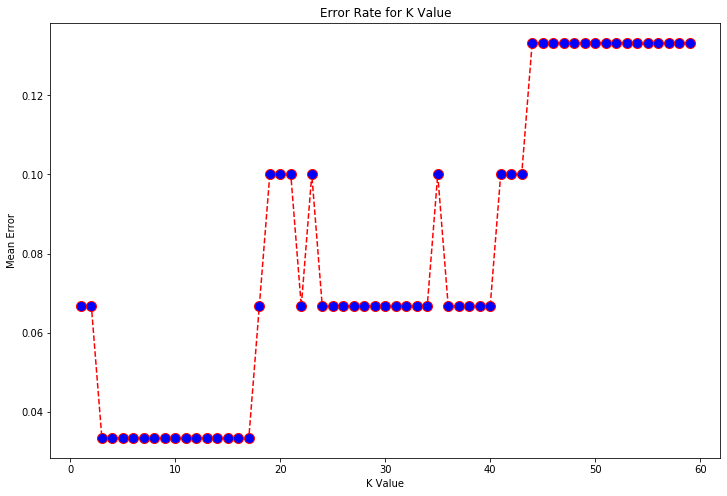

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 60), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate for K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### Hyperparameter optimization for k value using RandomizedSearchCV

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV


#We can use a grid search to find the best parameters for this model. Lets try
k=np.random.randint(1,50,60)


#Define a list of parameters for the models
params = {'n_neighbors' : k }
            



#We can build Grid Search model using the above parameters. 
#cv=5 means cross validation with 5 folds
random_search = RandomizedSearchCV(classifier,params,n_iter=5 ,cv=5, n_jobs=-1,verbose=0)
random_search .fit(X_train, y_train)


print("train score - " + str(random_search .score(X_train, y_train)))
print("test score - " + str(random_search .score(X_test, y_test)))

train score - 0.975
test score - 0.9666666666666667


In [12]:
print(random_search.best_params_)

{'n_neighbors': 7}
